# Circle tests

## Load libraries

In [3]:
import sys
sys.path.append('../')

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.sigmoid_activation import SigmoidActivation
from src.softmax_activation import SoftmaxActivation
from src.linear_activation import LinearActivation
from src.relu_activation import ReLUActivation
from src.network import Network
from src.log_error import LogError
from src.mean_squared_error import MeanSquaredError
from src.mean_absolute_error import MeanAbsoluteError
from src.relu_activation import ReLUActivation
from src import utils
from src import VisualizeNN as VisNN

## load circle datasets

In [5]:
sizes = ['100', '500', '1000', '10000']
datasets_circles = [('data.circles.train.' + size + '.csv', 
                    'data.circles.test.' + size + '.csv') for size in sizes]
datasets_circles

[('data.circles.train.100.csv', 'data.circles.test.100.csv'),
 ('data.circles.train.500.csv', 'data.circles.test.500.csv'),
 ('data.circles.train.1000.csv', 'data.circles.test.1000.csv'),
 ('data.circles.train.10000.csv', 'data.circles.test.10000.csv')]

In [26]:
dataframes_circles = [(pd.read_csv('../data_test/Classification/'+name[0]), 
                      pd.read_csv('../data_test/Classification/'+name[1])) for name in datasets_circles]


In [28]:
train_df, test_df =  dataframes_circles[2]
train_df.describe()

x            y          cls
count  1000.000000  1000.000000  1000.000000
mean      0.011158     0.011300     2.359000
std       0.578966     0.571358     1.101514
min      -0.997905    -0.999892     1.000000
25%      -0.494567    -0.470710     1.000000
50%       0.027681    -0.014034     2.000000
75%       0.514722     0.511731     3.000000
max       0.999235     0.998855     4.000000

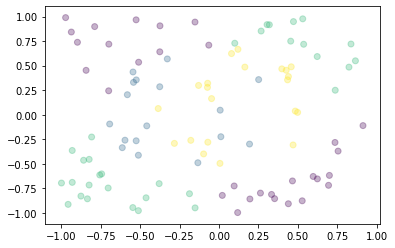

In [10]:
train_df, test_df =  dataframes_circles[0]
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'],cmap=plt.cm.viridis, alpha=.3)
plt.show()

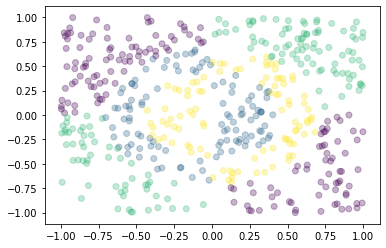

In [11]:
train_df, test_df =  dataframes_circles[1]
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'],cmap=plt.cm.viridis, alpha=.3)
plt.show()

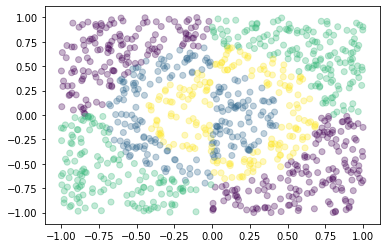

In [12]:
train_df, test_df =  dataframes_circles[2]
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'],cmap=plt.cm.viridis, alpha=.3)
plt.show()

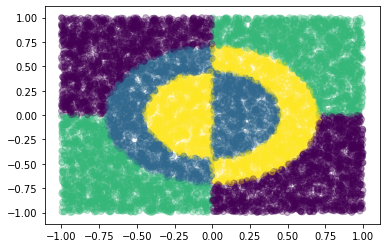

In [20]:
train_df, test_df =  dataframes_circles[3]
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'],cmap=plt.cm.viridis, alpha=.3)
plt.show()

### 1000 element dataset, 2 dimensional input

In [32]:
input_size, output_size = 2, 4
random_seed = 1234

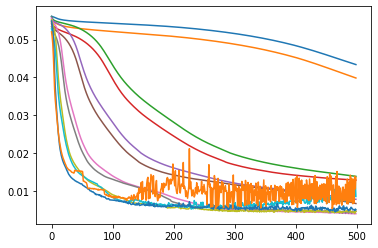

In [60]:
train_df, test_df = dataframes_circles[2]

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]


batch_size = 10
learning_rates = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1]
epochs = 500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, LogError(), random_seed)
    train_loss, validation_loss = utils.train_classification(network, 
                                                             train_df,
                                                             epochs,
                                                             lr,
                                                             batch_size=batch_size,
                                                             multiclass=True)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

for t, v in zip(train_losses, validation_losses):
    plt.plot(t)
    plt.plot(v)
plt.show()

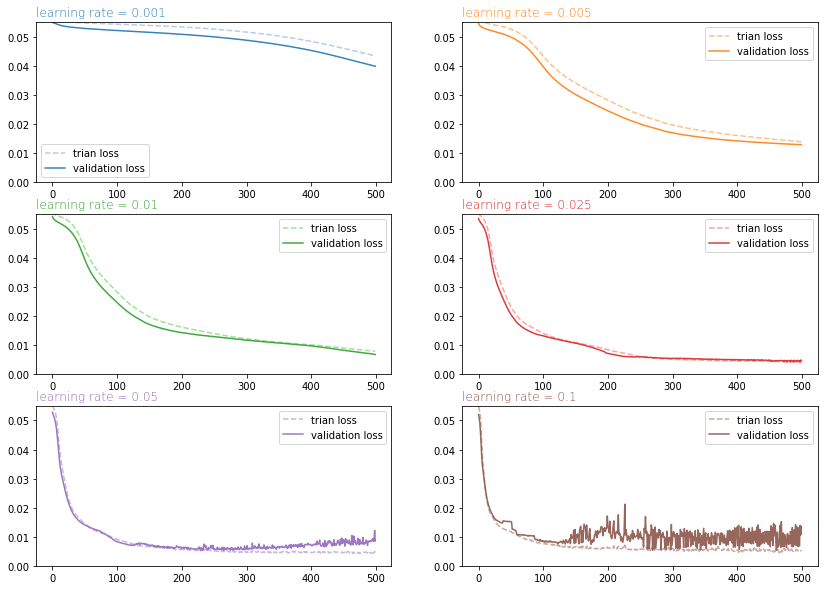

In [77]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(14, 10))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))

plt.show()

In [80]:
train_df, test_df = dataframes_circles[2]

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]


batch_size = 10
learning_rates = [0.005, 0.01, 0.015, 0.020, 0.025, 0.03]
epochs = 2500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, LogError(), random_seed)
    train_loss, validation_loss = utils.train_classification(network, 
                                                             train_df,
                                                             epochs,
                                                             lr,
                                                             batch_size=batch_size,
                                                             multiclass=True)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

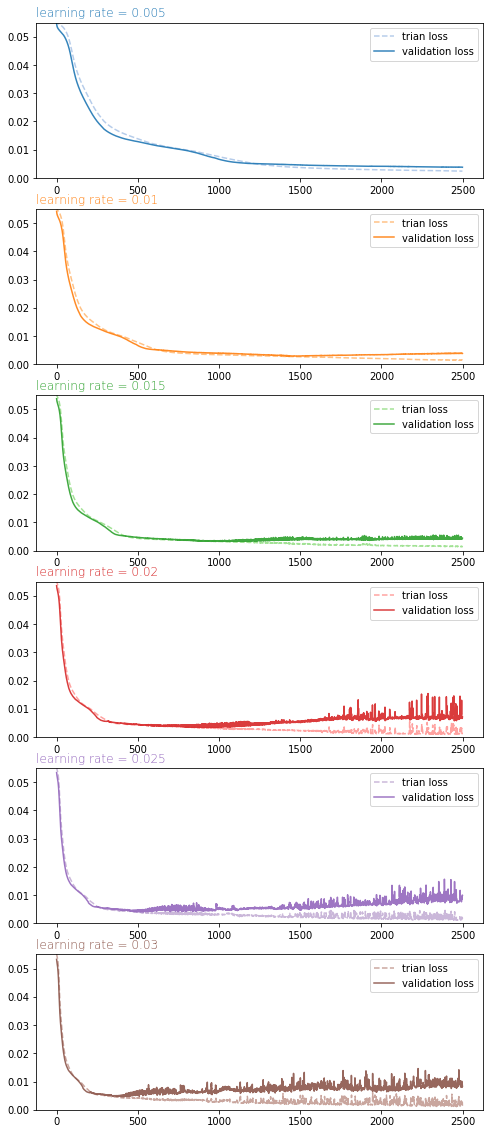

In [85]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(8, 20))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(6, 1, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))
plt.show()

In [96]:
for losses in validation_losses:
    print(min(losses), losses.index(min(losses)))

0.0037890287332740945 2498
0.002879772673099152 1462
0.0032506767504680563 978
0.0034372043256035096 865
0.004070233680359201 533
0.00464001083356751 415


In [97]:
# 1000

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]

N = 5
epochs = 1500
learning_rate = 0.01
batch_size=10

train_df, test_df = dataframes_circles[2]
acc = np.zeros((N,1))
for i in range(N):
    network = Network(input_size, layers, LogError(), np.random.randint(0,1000))
    utils.train_classification(network, 
                               train_df, 
                               epochs, 
                               learning_rate,
                               batch_size=batch_size,
                               multiclass=True)
    acc[i] = utils.calculate_accuacy(network, test_df, multiclass=True)
print(acc.mean(axis=0), acc.std(axis=0))

[0.9338] [0.02274555]


In [108]:
import importlib
importlib.reload(utils)

<module 'src.utils' from '/home/ccc/IAD/pw-deep-learning/src/utils.py'>

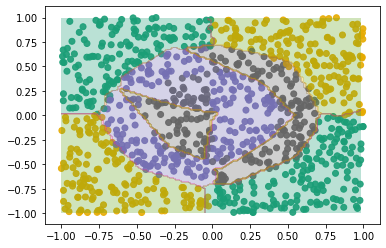

(3, 9)
(9, 9)
(9, 9)
(9, 5)
[(3, 9), (9, 9), (9, 9), (9, 5)] [3, 9, 9, 9, 4]


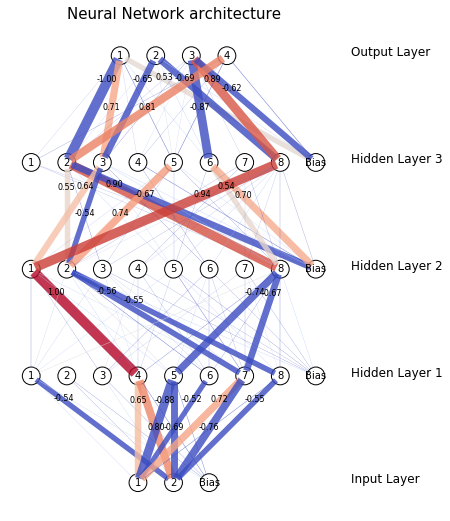

In [109]:
utils.plot_decision_boundary(network, test_df)
utils.draw_weights(network)

In [101]:
print(acc)

[[0.941]
 [0.959]
 [0.953]
 [0.918]
 [0.898]]


### Extended input

In [35]:
import copy

input_size, output_size = 5, 4

train_df2, test_df2 = dataframes_circles[2]

train_df = copy.deepcopy(train_df2)
test_df = copy.deepcopy(test_df2)

train_df['xy'] = train_df['x'] * train_df['y']
train_df['sinx'] = np.sin(train_df['x'])
train_df['siny'] = np.sin(train_df['y'])


test_df['xy'] = test_df['x'] * test_df['y']
test_df['sinx'] = np.sin(test_df['x'])
test_df['siny'] = np.sin(test_df['y'])

df1 = test_df.pop('cls')
test_df['cls'] = df1

df1 = train_df.pop('cls')
train_df['cls'] = df1

train_df.head()

x         y        xy      sinx      siny  cls
0  0.967305  0.034912  0.033771  0.823359  0.034905    3
1  0.038775 -0.419788 -0.016277  0.038766 -0.407567    2
2  0.677513 -0.765008 -0.518303  0.626857 -0.692543    1
3 -0.733247 -0.980748  0.719130 -0.669285 -0.830914    3
4  0.826273  0.031055  0.025660  0.735411  0.031050    3

In [114]:
layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]


batch_size = 10
learning_rates = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1]
epochs = 1500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, LogError(), random_seed)
    train_loss, validation_loss = utils.train_classification(network, 
                                                             train_df,
                                                             epochs,
                                                             lr,
                                                             batch_size=batch_size,
                                                             multiclass=True)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

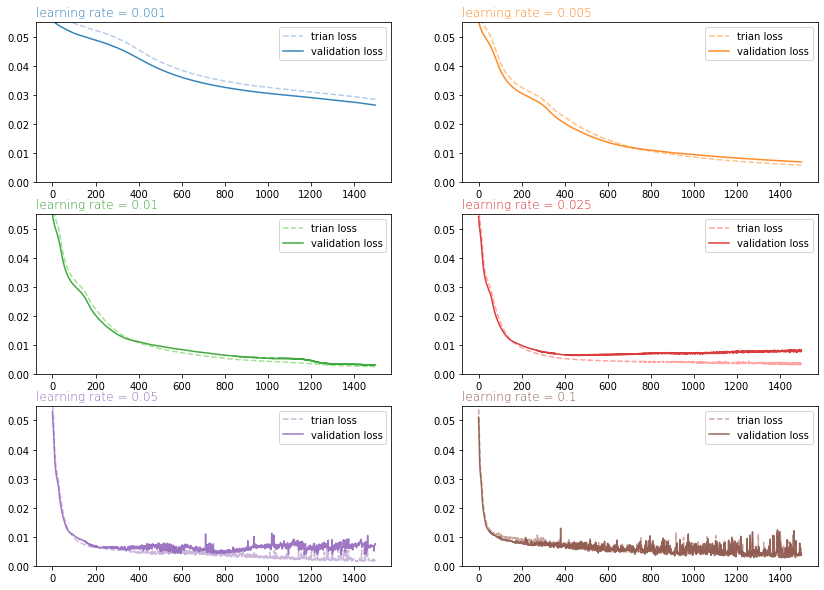

In [115]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(14, 10))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))

plt.show()

In [36]:
import copy

input_size, output_size = 5, 4

train_df2, test_df2 = dataframes_circles[2]

train_df = copy.deepcopy(train_df2)
test_df = copy.deepcopy(test_df2)

train_df['xy'] = train_df['x'] * train_df['y']
train_df['sinx'] = np.sin(train_df['x'])
train_df['siny'] = np.sin(train_df['y'])


test_df['xy'] = test_df['x'] * test_df['y']
test_df['sinx'] = np.sin(test_df['x'])
test_df['siny'] = np.sin(test_df['y'])

df1 = test_df.pop('cls')
test_df['cls'] = df1

df1 = train_df.pop('cls')
train_df['cls'] = df1
test_df.head()

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]


batch_size = 10
learning_rates = [0.005, 0.01, 0.015, 0.020, 0.025, 0.03]
epochs = 2500
train_losses = []
validation_losses = []

for lr in learning_rates:
    network = Network(input_size, layers, LogError(), random_seed)
    train_loss, validation_loss = utils.train_classification(network, 
                                                             train_df,
                                                             epochs,
                                                             lr,
                                                             batch_size=batch_size,
                                                             multiclass=True)
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

KeyboardInterrupt: 

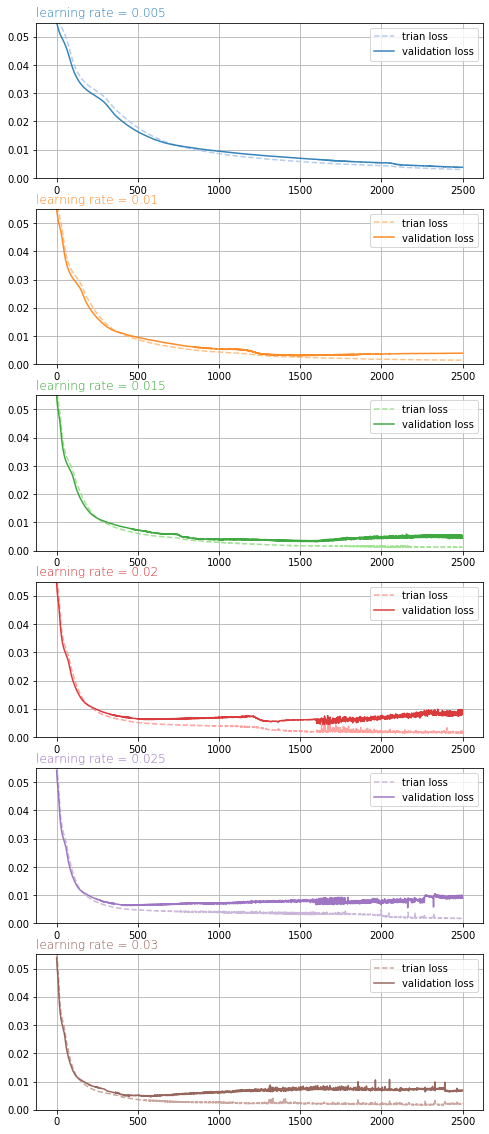

In [124]:
palette = plt.get_cmap('tab20')
fig = plt.figure(figsize=(8, 20))
for i in range(len(learning_rates)):
    ax = fig.add_subplot(6, 1, i+1)
    ax.set_ylim(0.0, 0.055)
    plt.plot(train_losses[i], color=palette(1+2*i), linestyle='dashed', alpha=0.9, label='trian loss')
    plt.plot(validation_losses[i], color=palette(2*i), alpha=0.9, label='validation loss')
    plt.grid()
    plt.legend()
    plt.title('learning rate = ' + str(learning_rates[i]), loc='left', fontsize=12, fontweight=0, color=palette(2*i))
plt.show()

In [39]:
import copy

input_size, output_size = 5, 4

train_df2, test_df2 = dataframes_circles[2]

train_df = copy.deepcopy(train_df2)
test_df = copy.deepcopy(test_df2)

train_df['xy'] = train_df['x'] * train_df['y']
train_df['sinx'] = np.sin(train_df['x'])
train_df['siny'] = np.sin(train_df['y'])


test_df['xy'] = test_df['x'] * test_df['y']
test_df['sinx'] = np.sin(test_df['x'])
test_df['siny'] = np.sin(test_df['y'])

df1 = test_df.pop('cls')
test_df['cls'] = df1

df1 = train_df.pop('cls')
train_df['cls'] = df1
test_df.head()

layers = [(8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (8, ReLUActivation(), True),
          (output_size, SoftmaxActivation(), True)]

N = 5
epochs = 1300
learning_rate = 0.01
batch_size=10
trains, vals = [], []
acc = np.zeros((N,1))
for i in range(N):
    network = Network(input_size, layers, LogError(), np.random.randint(0,1000))
    tr, va = utils.train_classification(network, 
                               train_df, 
                               epochs, 
                               learning_rate,
                               batch_size=batch_size,
                               multiclass=True)
    trains.append(tr)
    vals.append(va)
    acc[i] = utils.calculate_accuacy(network, test_df, multiclass=True)
print(acc.mean(axis=0), acc.std(axis=0))

[0.939] [0.00991968]


In [43]:
acc

array([[0.948],
       [0.948],
       [0.944],
       [0.923],
       [0.932]])

(6, 9)
(9, 9)
(9, 9)
(9, 5)
[(6, 9), (9, 9), (9, 9), (9, 5)] [6, 9, 9, 9, 4]


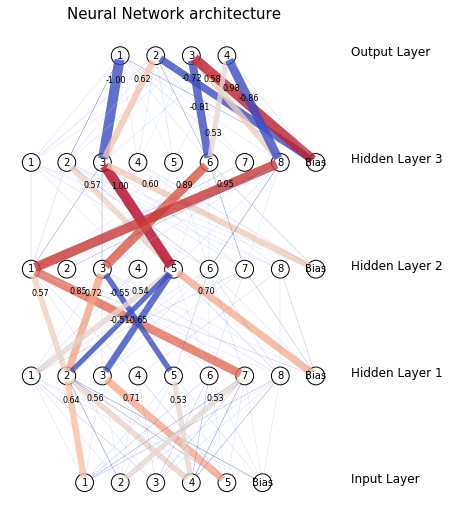

In [42]:
#utils.plot_decision_boundary(network, test_df)
utils.draw_weights(network)